In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

In [24]:
torch.cuda.is_available()

True

In [3]:
from pymoo.core.problem import ElementwiseProblem

## 1-NSGA2

In [25]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=7, #x is a one-dimensional NumPy array of length n_var=2
                         n_obj=3, #number of objectives
                         n_constr=10, #number of constraints
                         xl=np.array([0.5, 0.45, 0.5, 0.5, 0.875, 0.4, 0.4]), #lower
                         xu=np.array([1.5, 1.35, 1.5, 1.5, 2.625, 1.2, 1.2]) #upper
                        )
    
    def _evaluate(self, x, out, *args, **kwargs): 
        #x:variable(numpy array), out:output(dictionary). 
        #out["F"]: numpy array with n_obj length, objective values are written here.
        #out["G"]: numpy array with n_constr length, constraints values are written here. 
        
        f_capital = 4.72 - 0.5*x[3] - 0.19*x[1]*x[2]
        v_mbp = 10.58 - 0.674*x[0]*x[1] - 0.67275*x[1]
        v_fd = 16.45 - 0.489*x[2]*x[6] - 0.843*x[4]*x[5]
        
        f1 = 1.98 + 4.9*x[0] + 6.67*x[1] + 6.98*x[2] + 4.01*x[3] + 1.78*x[4] + 0.000001*x[5] + 2.73*x[6]
        f2 = f_capital
        f3 = 0.5*(v_mbp + v_fd)
        
        #constraints: g must be zero or negative
        g1 = 1.16 - 0.3717*x[1]*x[3] - 0.0092928*x[2] -1 
        g2 = 0.261 - 0.0159*x[0]*x[1] - 0.06486*x[0] - 0.019*x[1]*x[6] + 0.0144*x[2]*x[4] \
            + 0.0154464*x[5] - 0.32
        g3 = 0.214 + 0.00817*x[4] - 0.045195*x[0] - 0.0135168*x[0] \
            + 0.03099*x[1]*x[5] - 0.018*x[1]*x[6] + 0.007176*x[2] \
            + 0.023232*x[2] - 0.00364*x[4]*x[5] - 0.018*x[1]**2 - 0.32
        g4 = 0.74 - 0.61*x[1] - 0.031296*x[2] - 0.031872*x[6] + 0.227*x[1]**2 - 0.32
        g5 = 28.98 + 3.818*x[2] - 4.2*x[0]*x[1] + 1.27296*x[5] - 2.68065*x[6] - 32
        g6 = 33.86 + 2.95*x[2] - 5.057*x[0]*x[1] - 3.795*x[1] - 3.4431*x[6] + 1.45728 - 32
        g7 = 46.36 - 9.9*x[1] - 4.4505*x[0] -32
        g8 = f_capital - 4
        g9 = v_mbp -9.9
        g10 = v_fd -15.7
        
        out["F"] = [f1,f2,f3]
        out["G"] = [g1,g2,g3,g4,g5,g6,g7,g8,g9,g10]                         

In [26]:
problem = MyProblem()

In [27]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=1000,
    n_offsprings=400,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

In [28]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 3000)

In [29]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               #seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |    1000 |  0.00000E+00 |  1.976515977 |      42 |            - |            -
    2 |    1400 |  0.00000E+00 |  0.535761948 |      74 |  0.029584775 |        ideal
    3 |    1800 |  0.00000E+00 |  0.073012881 |      96 |  0.050076835 |        ideal
    4 |    2200 |  0.00000E+00 |  0.008439926 |     123 |  0.044500397 |        nadir
    5 |    2600 |  0.00000E+00 |  0.00000E+00 |     138 |  0.090470086 |        ideal
    6 |    3000 |  0.00000E+00 |  0.00000E+00 |     165 |  0.021015271 |        ideal
    7 |    3400 |  0.00000E+00 |  0.00000E+00 |     185 |  0.063831453 |        ideal
    8 |    3800 |  0.00000E+00 |  0.00000E+00 |     194 |  0.047069894 |        ideal
    9 |    4200 |  0.00000E+00 |  0.00000E+00 |     232 |  0.032809764 |        nadir
   10 |    4600 |  0.00000E+00 |  0.00000E+00 |     233 |  0.040598836 |        nadir
   11 |    5000 |  0.00000E+00 |  0.00000E+00 |     27

In [10]:
X[0], X[1], X[2]

(array([0.50623403, 1.23832297, 0.50796814, 1.49332748, 0.88536483,
        0.87401138, 0.40067373]),
 array([1.41198433, 1.35      , 1.5       , 1.5       , 2.6031432 ,
        1.19998624, 1.15815652]),
 array([0.50899008, 1.22603872, 0.50000023, 1.20706349, 1.6270494 ,
        1.19746341, 0.40000887]))

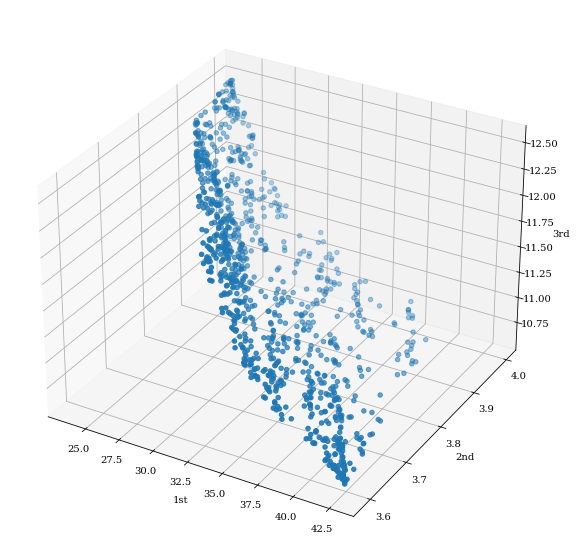

In [31]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')
ax.scatter(F[:,0], F[:,1], F[:,2])
ax.set_xlabel("1st")
ax.set_ylabel("2nd")
ax.set_zlabel("3rd")
fig.show()

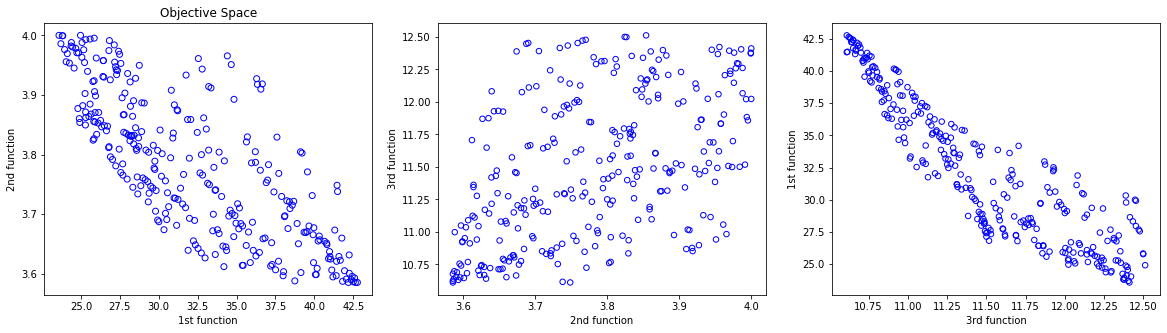

In [12]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(F[:, 0], F[:, 1], facecolors='none', edgecolors='blue')
ax1.set_xlabel("1st function")
ax1.set_ylabel("2nd function")

ax2.scatter(F[:, 1], F[:, 2], s=30, facecolors='none', edgecolors='blue')
ax2.set_xlabel("2nd function")
ax2.set_ylabel("3rd function")

ax3.scatter(F[:, 2], F[:, 0], s=30, facecolors='none', edgecolors='blue')
ax3.set_xlabel("3rd function")
ax3.set_ylabel("1st function")

ax1.set_title("Objective Space")
fig.show()

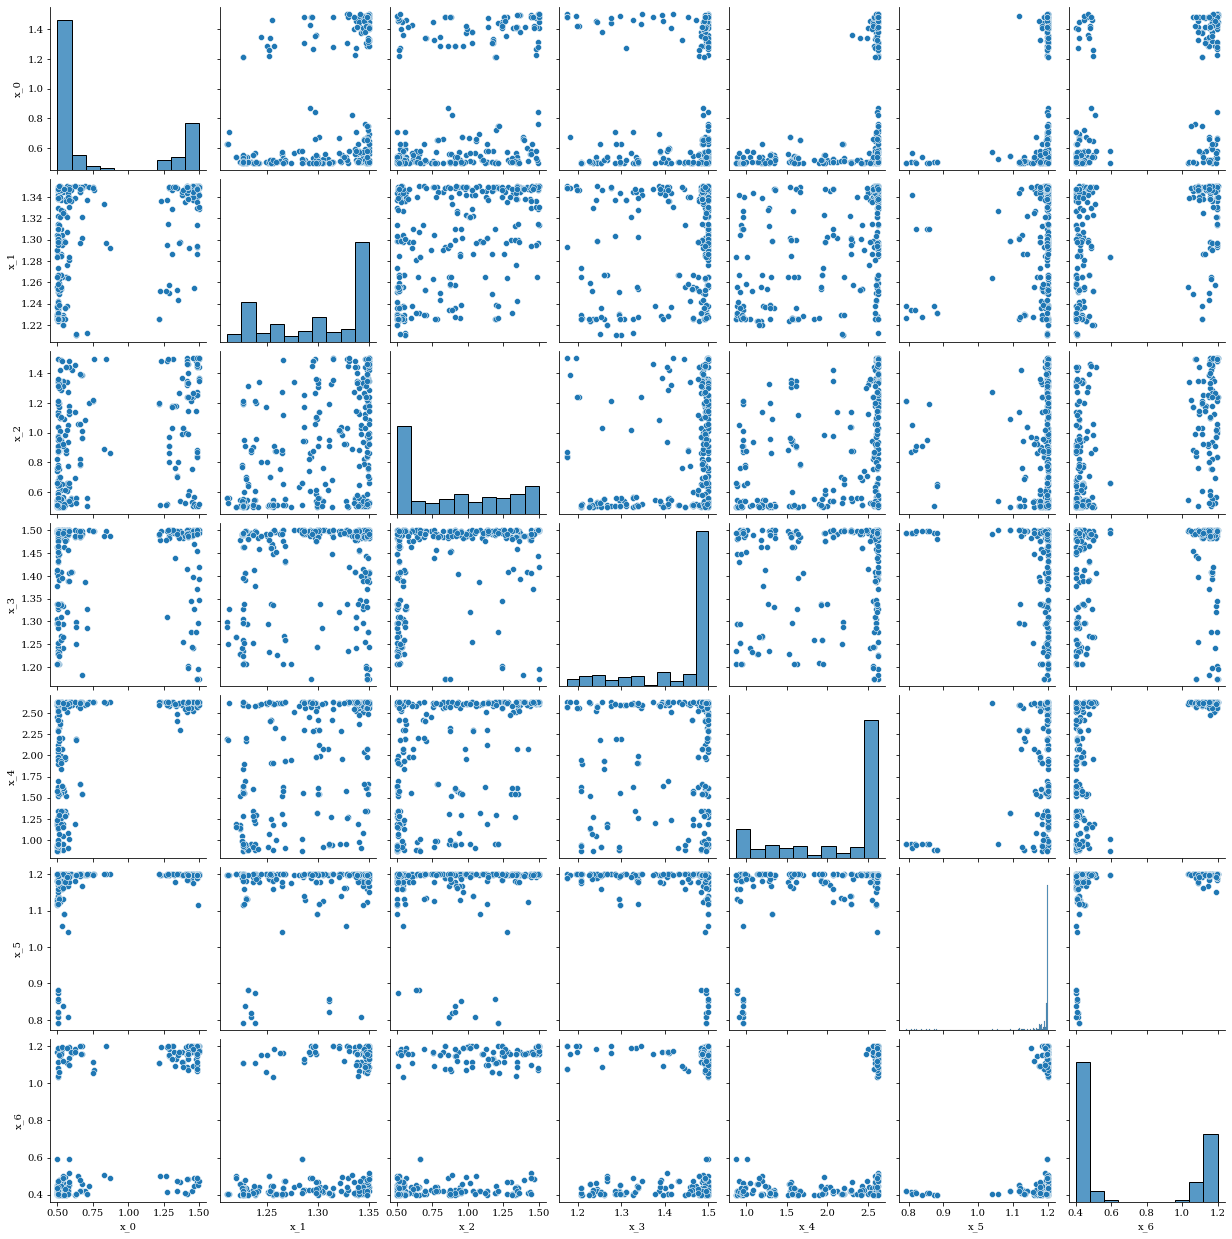

In [20]:
df = pd.DataFrame(X)
df.columns=["x_0","x_1","x_2","x_3","x_4","x_5","x_6"]
fig = sns.pairplot(df)
fig.savefig("07_nsga2")

## C-TAEA

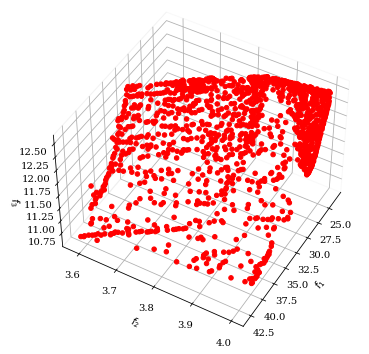

In [13]:
from pymoo.algorithms.moo.ctaea import CTAEA
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

#problem = get_problem("c1dtlz1", None, 3, k=5)

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=50)

# create the algorithm object
algorithm = CTAEA(ref_dirs=ref_dirs)

# execute the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 600),
               seed=1
               )

sc = Scatter(legend=False, angle=(45, 30))
sc.add(problem.pareto_front(ref_dirs), plot_type='surface', alpha=0.2, label="PF", color="blue")
sc.add(res.F, color="red")
sc.show()

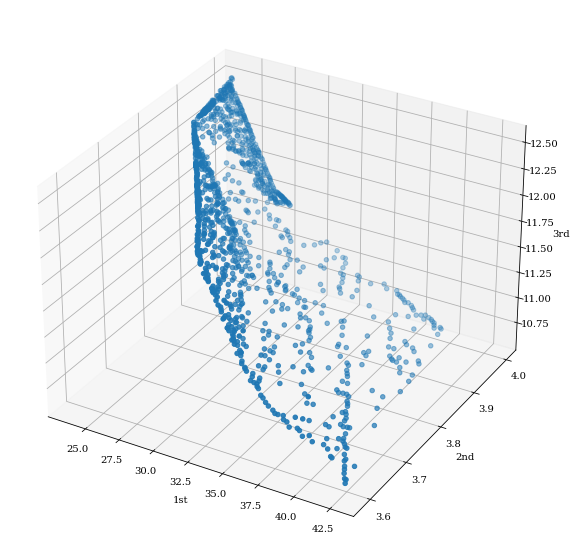

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')
ax.scatter(res.F[:,0], res.F[:,1], res.F[:,2])
ax.set_xlabel("1st")
ax.set_ylabel("2nd")
ax.set_zlabel("3rd")
fig.show()

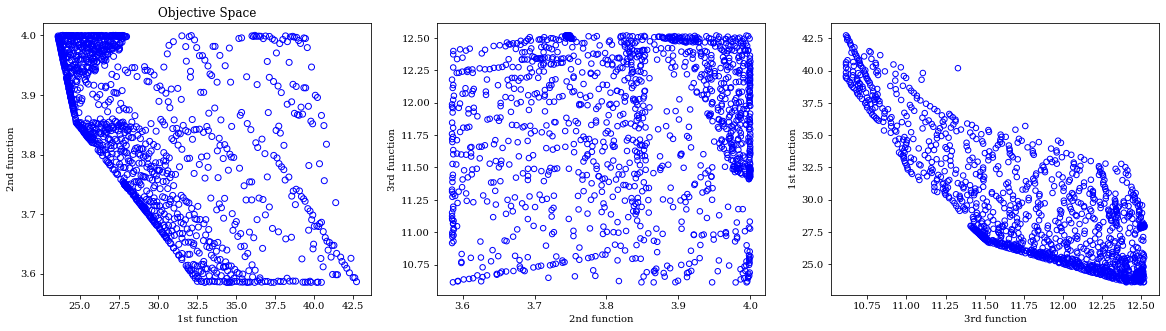

In [14]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(res.F[:, 0], res.F[:, 1], facecolors='none', edgecolors='blue')
ax1.set_xlabel("1st function")
ax1.set_ylabel("2nd function")

ax2.scatter(res.F[:, 1], res.F[:, 2], s=30, facecolors='none', edgecolors='blue')
ax2.set_xlabel("2nd function")
ax2.set_ylabel("3rd function")

ax3.scatter(res.F[:, 2], res.F[:, 0], s=30, facecolors='none', edgecolors='blue')
ax3.set_xlabel("3rd function")
ax3.set_ylabel("1st function")

ax1.set_title("Objective Space")
fig.show()

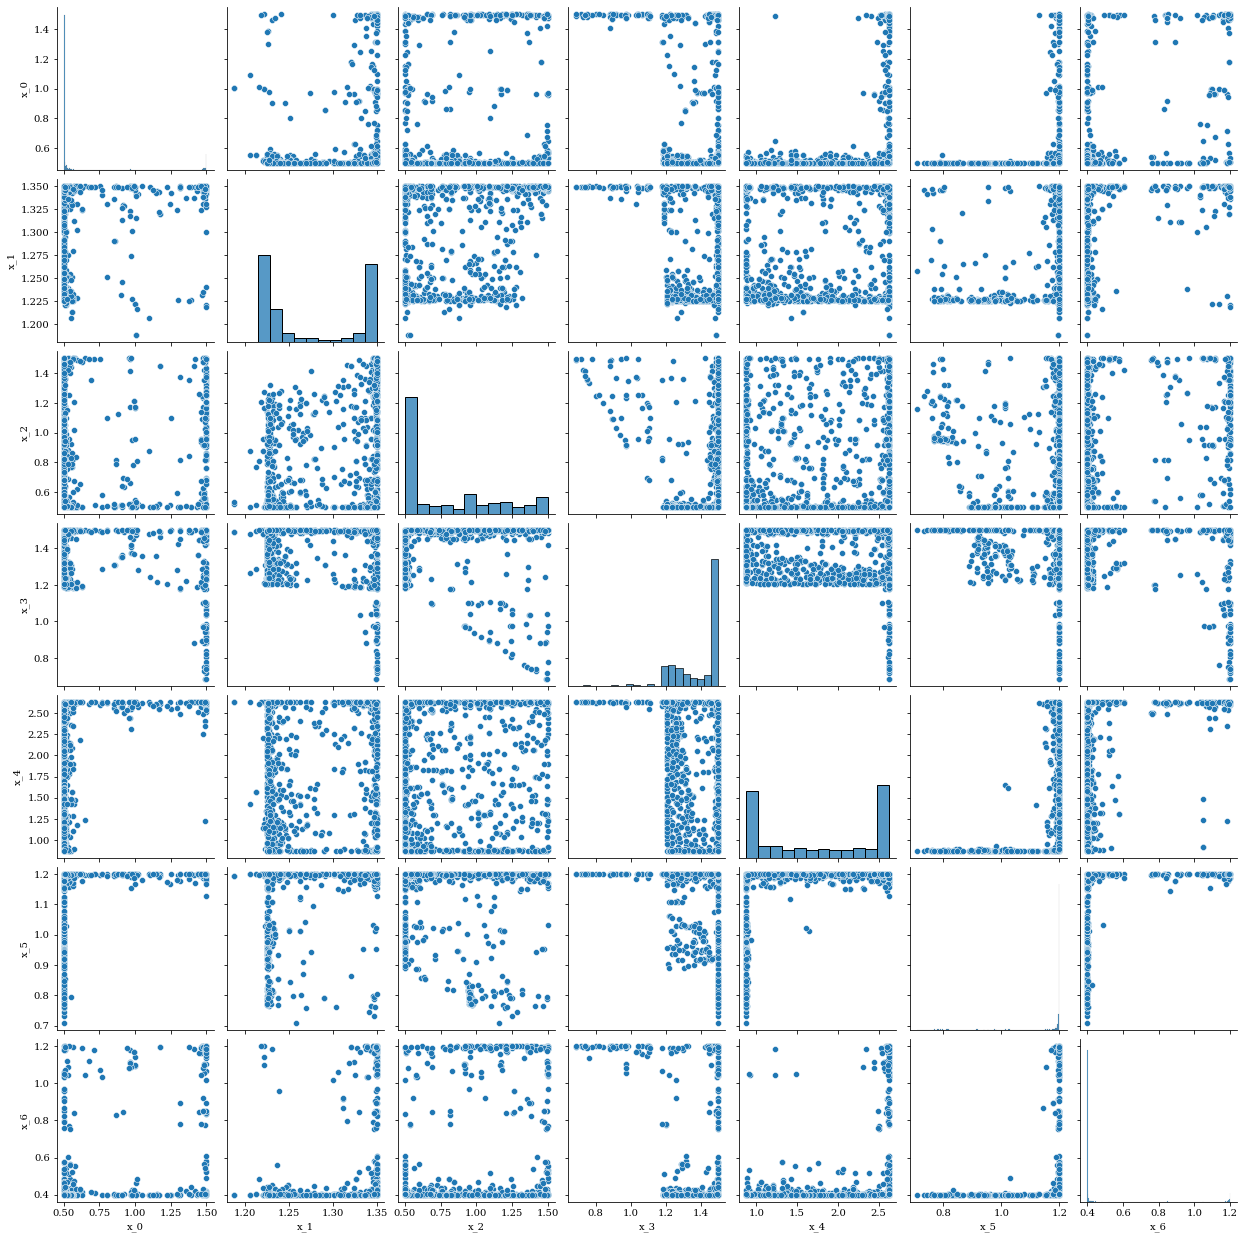

In [21]:
df = pd.DataFrame(res.X)
df.columns=["x_0","x_1","x_2","x_3","x_4","x_5","x_6"]
fig = sns.pairplot(df)
fig.savefig("07_ctaea")